C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10 - Train Loss: 1.9395 - Train Accuracy: 67.66% - Val Loss: 0.2721 - Val Accuracy: 90.78%
Epoch 2/10 - Train Loss: 0.3470 - Train Accuracy: 90.00% - Val Loss: 0.1131 - Val Accuracy: 97.14%
Epoch 3/10 - Train Loss: 0.1509 - Train Accuracy: 96.36% - Val Loss: 0.0558 - Val Accuracy: 99.61%
Epoch 4/10 - Train Loss: 0.1804 - Train Accuracy: 95.32% - Val Loss: 0.0755 - Val Accuracy: 97.27%
Epoch 5/10 - Train Loss: 0.1513 - Train Accuracy: 95.58% - Val Loss: 0.0157 - Val Accuracy: 99.35%
Epoch 6/10 - Train Loss: 0.2005 - Train Accuracy: 95.97% - Val Loss: 0.0578 - Val Accuracy: 98.57%
Epoch 7/10 - Train Loss: 0.2076 - Train Accuracy: 93.64% - Val Loss: 0.2942 - Val Accuracy: 91.43%
Epoch 8/10 - Train Loss: 0.2471 - Train Accuracy: 94.16% - Val Loss: 0.0894 - Val Accuracy: 97.53%
Epoch 9/10 - Train Loss: 0.1383 - Train Accuracy: 95.84% - Val Loss: 0.0729 - Val Accuracy: 97.66%
Epoch 10/10 - Train Loss: 0.1381 - Train Accuracy: 97.53% - Val Loss: 0.0365 - Val Accuracy: 99.35%


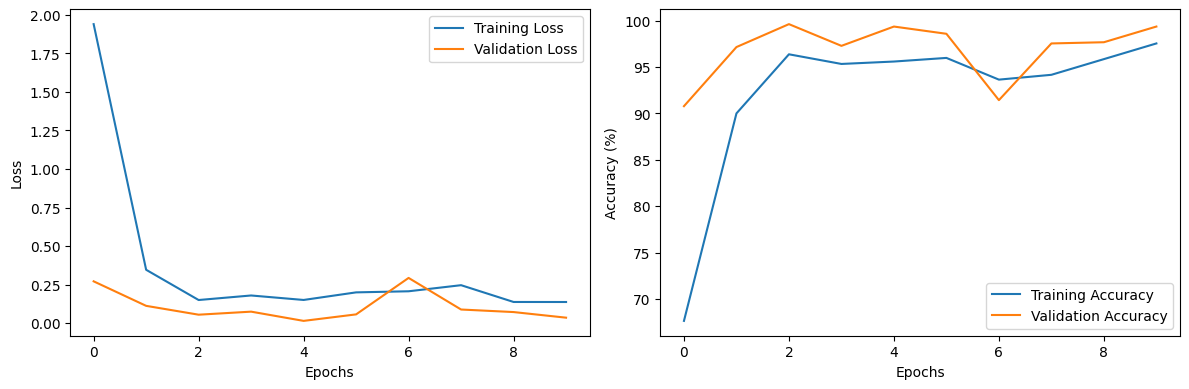

In [1]:
#Import libraries

import torch
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets, models
import matplotlib.pyplot as plt
import numpy as np

# Define data transformations and load dataset --  to prepare the data for training and make it more suitable for neural network learning
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
train_dataset = datasets.ImageFolder("Monkeypox Skin Image Dataset", transform=transform)
val_dataset = datasets.ImageFolder("Monkeypox Skin Image Dataset", transform=transform)

# Define dataloaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32)

# Initialize an EfficientNet model (replace with your EfficientNet model initialization)
model = models.efficientnet_b0(pretrained=True)
model.fc = torch.nn.Linear(1280, len(train_dataset.classes))  # Modify the output layer for your specific task

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store training metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = (correct_train / total_train) * 100.0
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = (correct_val / total_val) * 100.0
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{epochs} - "
          f"Train Loss: {train_loss:.4f} - Train Accuracy: {train_accuracy:.2f}% - "
          f"Val Loss: {val_loss:.4f} - Val Accuracy: {val_accuracy:.2f}%")

# Plot training and validation metrics after model training
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
###Predicting the class for the random image

In [8]:
# Load an image for classification (replace 'image_path' with your image file path)
image_path = 'Monkeypox Skin Image Dataset/Measles/measles81.png'  # Replace with the path to your image file
image = Image.open(image_path)

In [9]:
# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image).unsqueeze(0)


In [10]:
# Get the predicted class probabilities and class index
probabilities = torch.softmax(output[0], dim=0)
predicted_class_index = torch.argmax(probabilities).item()

# Get the predicted class name using the class_labels list
predicted_class_name = train_dataset.classes[predicted_class_index]

# Print the results
print("Predicted Class:", predicted_class_name)

Predicted Class: Measles
